# Estabilidad: sistemas *stiff* y A–estabilidad para métodos Runge–Kutta

> Notación: usaremos $z = h\lambda$, $C^-=\{z\in\mathbb{C}:\operatorname{Re}z<0\}$, y $\|\cdot\|$ la norma euclídea.

##  Motivación de *stiffness*(rigidez)

Considera el sistema lineal
$$
y'(t) \;=\; \Lambda\,y(t),\qquad 
\Lambda=\begin{pmatrix}-100 & 1\\[2pt] 0 & -\tfrac{1}{10}\end{pmatrix},\qquad y(0)=y_0.
$$

La factorización espectral $\Lambda = VDV^{-1}$ con
$$
V=\begin{pmatrix}1&1\\[2pt]0&\tfrac{999}{10}\end{pmatrix},\qquad
D=\begin{pmatrix}-100&0\\[2pt]0&-\tfrac{1}{10}\end{pmatrix},
$$
muestra que la solución exacta tiene **dos modos** (uno rápido y uno lento):
$$
y(t)\;=\;e^{t\Lambda}y_0 \;=\; e^{-100t}\,x_1 \;+\; e^{-t/10}\,x_2,
$$
para ciertos $x_1,x_2$ que dependen de $y_0$ pero no de $t$. El modo $e^{-100t}$ decae
extremadamente rápido (p. ej. $e^{-100\cdot 0.1}\approx 4.54\times 10^{-5}$), mientras que el modo $e^{-t/10}$ decae mil veces más lento.
Incluso para $t$ pequeños, el término con $e^{-100t}$ **desaparece** numéricamente y la solución queda dominada por el modo lento.


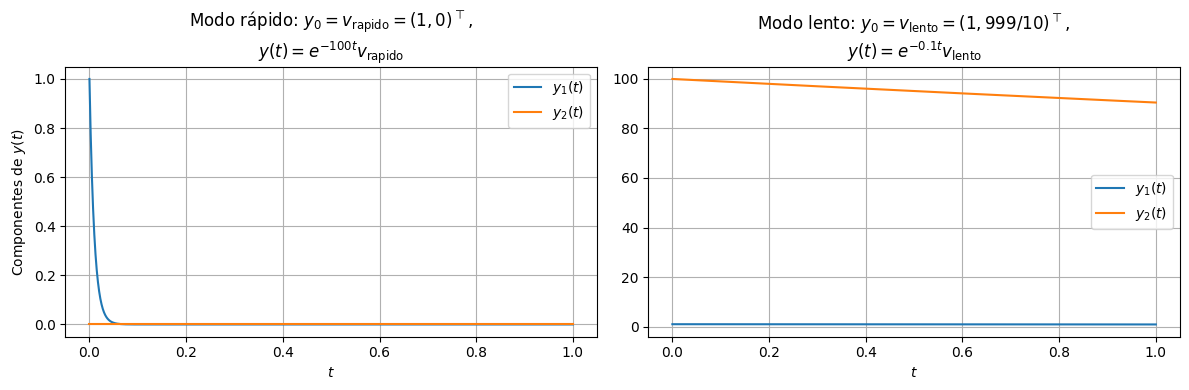

In [6]:
# Dos gráficas lado a lado: modo rápido y modo lento
import numpy as np
import matplotlib.pyplot as plt

Lam = np.array([[-100.0, 1.0],
                [   0.0,-0.1]])

v_rapido = np.array([1.0, 0.0])
v_lento  = np.array([1.0, 999.0/10.0])

t = np.linspace(0.0, 1.0, 400)
y_rapido = np.outer(np.exp(-100.0*t), v_rapido)
y_lento  = np.outer(np.exp(-0.1*t),   v_lento)

fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Modo rápido
axs[0].plot(t, y_rapido[:,0], label="$y_1(t)$")
axs[0].plot(t, y_rapido[:,1], label="$y_2(t)$")
axs[0].set_xlabel("$t$")
axs[0].set_ylabel("Componentes de $y(t)$")
axs[0].set_title("Modo rápido: $y_0 = v_{\\mathrm{rapido}} = (1,0)^{\\top}$,\n$y(t)=e^{-100 t}v_{\\mathrm{rapido}}$")
axs[0].legend()
axs[0].grid(True)

# Modo lento
axs[1].plot(t, y_lento[:,0], label="$y_1(t)$")
axs[1].plot(t, y_lento[:,1], label="$y_2(t)$")
axs[1].set_xlabel("$t$")
axs[1].set_title("Modo lento: $y_0 = v_{\\mathrm{lento}} = (1,999/10)^{\\top}$,\n$y(t)=e^{-0.1 t}v_{\\mathrm{lento}}$")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


### Comparación de los modos rápido y lento

Las dos gráficas anteriores ilustran la diferencia entre los **modos** que componen la solución del sistema lineal
$$
y'(t)=\Lambda\,y(t), \qquad 
\Lambda=\begin{pmatrix}-100 & 1\\[2pt] 0 & -\tfrac{1}{10}\end{pmatrix}.
$$

1. **Modo rápido ($\lambda=-100$):**  
   Se obtiene al tomar como condición inicial el vector propio asociado, $y_0=v_{\mathrm{rapido}}=(1,0)^{\top}$.  
   La solución es $y(t)=e^{-100t}v_{\mathrm{rapido}}$, cuyas componentes decaen casi instantáneamente hacia cero.  
   En la gráfica, ambas componentes desaparecen numéricamente antes de que $t$ llegue a $0.1$.

2. **Modo lento ($\lambda=-0.1$):**  
   Tomando $y_0=v_{\mathrm{lento}}=(1,999/10)^{\top}$, la solución $y(t)=e^{-0.1t}v_{\mathrm{lento}}$ decae muy lentamente.  
   En la escala $t\in[0,1]$ parece casi estacionaria, pues el factor de decaimiento $e^{-0.1t}$ apenas disminuye un 10%.

Esta enorme diferencia en escalas temporales muestra por qué el sistema se considera **stiff**:  
aunque ambos modos son estables, el paso de integración que requiere el modo rápido para ser estable
en un método explícito es tan pequeño que lo hace ineficiente para seguir el modo lento.


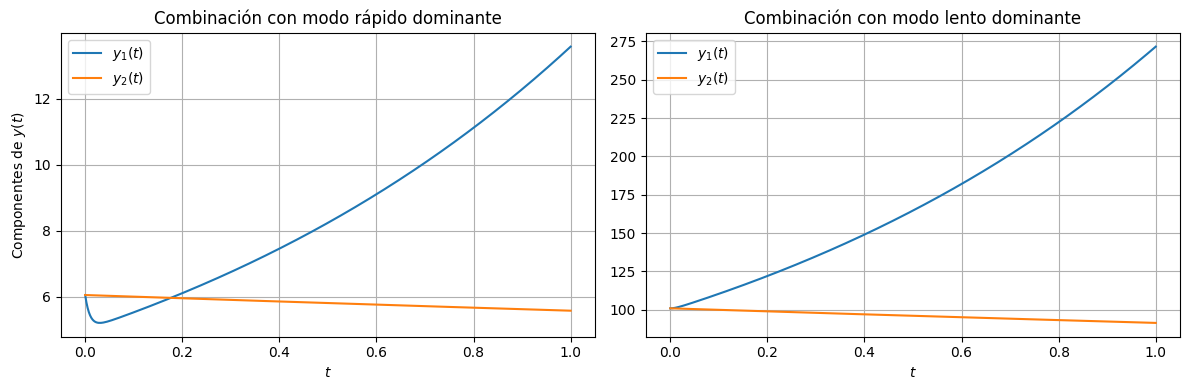

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Matriz y eigenvectores
Lam = np.array([[-100.0, 1.0],
                [   0.0,-0.1]])
v_rapido = np.array([1.0, 0.0])
v_lento = np.array([1.0, 999.0/10.0])

# Combinaciones lineales: dominancia rápida y dominancia lenta
y0_rapida = v_rapido + 0.05*v_lento   # modo rápido dominante
y0_lenta  = 0.05*v_rapido + v_lento   # modo lento dominante

# Malla temporal y soluciones exactas
t = np.linspace(0, 1, 400)
def sol(t, y0): return np.array([np.exp(ti*Lam)@y0 for ti in t])

y_rapida = sol(t, y0_rapida)
y_lenta  = sol(t, y0_lenta)

# Graficar ambas soluciones lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12,4))

axs[0].plot(t, y_rapida[:,0], label="$y_1(t)$")
axs[0].plot(t, y_rapida[:,1], label="$y_2(t)$")
axs[0].set_title("Combinación con modo rápido dominante")
axs[0].set_xlabel("$t$")
axs[0].set_ylabel("Componentes de $y(t)$")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(t, y_lenta[:,0], label="$y_1(t)$")
axs[1].plot(t, y_lenta[:,1], label="$y_2(t)$")
axs[1].set_title("Combinación con modo lento dominante")
axs[1].set_xlabel("$t$")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


### Combinación de modos rápido y lento

Las dos gráficas muestran la evolución de $y(t)=e^{t\Lambda}y_0$ cuando la condición inicial es una **combinación lineal**
de los eigenvectores rápido y lento.

- **Izquierda:** se eligió $y_0=v_{\mathrm{rapido}}+0.05\,v_{\mathrm{lento}}$, de modo que el modo rápido domina al inicio.  
  Se observa un decaimiento abrupto durante los primeros instantes, seguido de una rápida estabilización
  al régimen controlado por el modo lento.

- **Derecha:** se eligió $y_0=0.05\,v_{\mathrm{rapido}}+v_{\mathrm{lento}}$, de modo que el modo lento domina desde el principio.  
  La trayectoria apenas cambia en la escala temporal mostrada, reflejando la persistencia del modo de baja frecuencia.

Este contraste evidencia la coexistencia de escalas temporales muy distintas: un fenómeno característico de los
**sistemas rígidos (stiff)**.  Los métodos explícitos deben usar pasos lo bastante pequeños para capturar la fase
rápida, aunque el interés principal esté en la evolución lenta.



## **Euler explícito.** 
El esquema $y_{n+1}=(I+h\Lambda)y_n$ produce
$$
y_n = (I+h\Lambda)^n y_0 = (1-100h)^n x_1 + \Bigl(1-\tfrac{1}{10}h\Bigr)^n x_2.
$$
Si $h>\tfrac{1}{50}$, entonces $\lvert 1-100h\rvert>1$ y la componente “rápida” se **amplifica**; incluso si empieza en cero,
los números de máquina introducen redondeo que reinyecta ese modo y **eventualmente domina**.

##  **Euler implícito.** 
El esquema $y_{n+1}=(I-h\Lambda)^{-1}y_n$ genera factores
$$
\Bigl(1+100h\Bigr)^{-n}\,x_1 \;+\; \Bigl(1+\tfrac{1}{10}h\Bigr)^{-n}\,x_2,
$$
que **siempre** decaen para $h>0$.


### Simulación de los métodos de Euler explícito e implícito

En esta sección se implementan y grafican explícitamente las iteraciones de ambos esquemas numéricos para el sistema rígido
$$
y'(t)=\Lambda\,y(t), \qquad 
\Lambda=\begin{pmatrix}-100 & 1\\[2pt]0 & -\tfrac{1}{10}\end{pmatrix},
$$
usando un tamaño de paso $h=0.1$ y la condición inicial
$$
y_0=\begin{pmatrix}1\\[2pt]\tfrac{999}{10}\end{pmatrix}.
$$

El propósito es comparar la **evolución numérica** de $\|y_n\|$ (en escala logarítmica) para los dos métodos:

- **Euler explícito:**  
  $$
  y_{n+1}=(I+h\Lambda)\,y_n.
  $$  
  En este caso, la matriz de amplificación $(I+h\Lambda)$ posee un factor $(1-100h)$ que, para $h=0.1$, da $|1-100h|=9$.  
  Por tanto, el modo rápido se **amplifica exponencialmente**, incluso si su coeficiente inicial $x_1$ es teóricamente cero.  
  El redondeo de máquina introduce un error que excita este modo, haciendo que la norma crezca y oscile —esto es lo que se grafica.

- **Euler implícito:**  
  $$
  y_{n+1}=(I-h\Lambda)^{-1}\,y_n.
  $$  
  Aquí los factores de amplificación son $(1+100h)^{-1}$ y $(1+0.1h)^{-1}$, ambos menores que 1 en módulo.  
  Por ello, **todas las componentes decaen** monótonamente y el método permanece estable.

En las gráficas se muestra $\ln\|y_n\|$ contra $n$.  
- La curva de **Euler explícito** crece con oscilaciones, mostrando la **inestabilidad numérica** del modo rápido.  
- La curva de **Euler implícito** desciende suavemente, confirmando su estabilidad para cualquier $h>0$.

Esta comparación evidencia que, en sistemas rígidos, los métodos explícitos pueden volverse inestables incluso cuando la solución exacta es estable,
mientras que los métodos implícitos mantienen el comportamiento físico correcto.


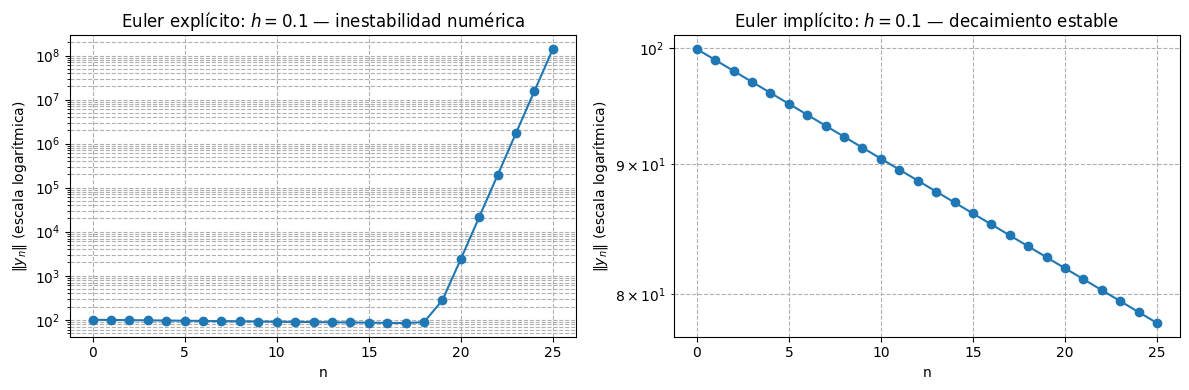

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Sistema y parámetros del ejemplo
Lam = np.array([[-100.0, 1.0],
                [   0.0,-0.1]])
y0 = np.array([1.0, 999.0/10.0])  # eigenvector "estable"
h  = 0.1
N  = 25  # número de pasos para reproducir la figura de Isserles

def explicit_euler_step(y, h):
    return (np.eye(2) + h*Lam) @ y

def implicit_euler_step(y, h):
    return np.linalg.solve((np.eye(2) - h*Lam), y)

# Secuencias
ye = np.zeros((N+1,2))
yi = np.zeros((N+1,2))
ye[0] = y0
yi[0] = y0
for n in range(N):
    ye[n+1] = explicit_euler_step(ye[n], h)
    yi[n+1] = implicit_euler_step(yi[n], h)

# Normas
ne = np.linalg.norm(ye, axis=1)
ni = np.linalg.norm(yi, axis=1)

# Graficar lado a lado en escala logarítmica
fig, axs = plt.subplots(1, 2, figsize=(12,4))

axs[0].plot(range(N+1), ne, marker='o')
axs[0].set_yscale('log')
axs[0].set_xlabel('n')
axs[0].set_ylabel(r'$\|y_n\|$ (escala logarítmica)')
axs[0].set_title('Euler explícito: $h=0.1$ — inestabilidad numérica')
axs[0].grid(True, which='both', ls='--')

axs[1].plot(range(N+1), ni, marker='o')
axs[1].set_yscale('log')
axs[1].set_xlabel('n')
axs[1].set_ylabel(r'$\|y_n\|$ (escala logarítmica)')
axs[1].set_title('Euler implícito: $h=0.1$ — decaimiento estable')
axs[1].grid(True, which='both', ls='--')

plt.tight_layout()
plt.show()


## Dominio de estabilidad lineal y A–estabilidad

Para la ecuación escalar
$$
y'(t)=\lambda y(t),\qquad y(0)=1,
$$
la solución exacta **decade a cero** ssi $\operatorname{Re}\lambda<0$. El **dominio de estabilidad lineal** $D$ de un método
es el conjunto de $z=h\lambda$ tales que, al aplicar el método con paso $h$, se obtiene $\lim_{n\to\infty} y_n=0$.

- Euler explícito: $y_n=(1+z)^n\!\implies D=\{\,z:\lvert 1+z\rvert<1\,\}$ (disco centrado en $-1$ y radio $1$).
- Regla del trapecio: $y_n=\bigl(\tfrac{1+\tfrac{1}{2}z}{1-\tfrac{1}{2}z}\bigr)^{n}\!\implies D=C^-$ (A–estable).

Diremos que un método es **A–estable** si $C^-\subseteq D$.

## Runge Kutta:

Sea un PVI $y'(t)=f(t,y(t))$, $y(t_n)=y_n$, paso $h>0$ y un método RK de $\nu$ etapas con coeficientes $\{a_{ij}\}_{i,j=1}^{\nu}$, $\{b_i\}_{i=1}^{\nu}$ y $\{c_i\}_{i=1}^{\nu}$. Las **etapas internas** $K_i$ y la **actualización** se definen por:
$$
\begin{aligned}
K_i &= f\!\Big(t_n + c_i h,\; y_n + h\sum_{j=1}^{\nu} a_{ij} K_j\Big), \qquad i=1,\dots,\nu,\\[4pt]
y_{n+1} &= y_n + h \sum_{i=1}^{\nu} b_i K_i.
\end{aligned}
$$

La estructura de coeficientes se resume en la **tabla de Butcher**:
$$
\begin{array}{c|cccc}
c_1 & a_{11} & a_{12} & \cdots & a_{1\nu}\\
c_2 & a_{21} & a_{22} & \cdots & a_{2\nu}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
c_\nu & a_{\nu 1} & a_{\nu 2} & \cdots & a_{\nu \nu}\\
\hline
 & b_1 & b_2 & \cdots & b_\nu
\end{array}
$$

- En un **RK explícito (ERK)** se tiene $a_{ij}=0$ para $j\ge i$ (matriz estrictamente triangular inferior), por lo que cada $K_i$ depende solo de $K_1,\dots,K_{i-1}$.
- En un **RK implícito (IRK)** aparece alguna dependencia con $j\ge i$, por lo que típicamente se resuelve un sistema no lineal para obtener $K_1,\dots,K_\nu$.

Aplicado al problema lineal de prueba $y'=\lambda y$ con $z=h\lambda$, las etapas satisfacen
$$
K = \mathbf{1}\,y_n + z\,A\,K \quad\Rightarrow\quad K=(I - zA)^{-1}\mathbf{1}\,y_n,
$$
y el paso queda
$$
y_{n+1}=\Bigl[1 + z\,b^\top (I - zA)^{-1}\mathbf{1}\Bigr]\,y_n \;=:\; r(z)\,y_n,
$$
donde $r(z)$ es la **función de amplificación** del método. En ERK, $I-zA$ es triangular con unos en la diagonal, luego $\det(I-zA)\equiv 1$ y $r(z)$ es un **polinomio**.

Sea un método RK de $\nu$ etapas con matriz $A=[a_{ij}]$, pesos $b=[b_1,\dots,b_\nu]^T$ y vector $1=[1,\dots,1]^T$.
Aplicado a $y'=\lambda y$ con paso $h$ y $z=h\lambda$, las etapas verifican
$$
K = 1\,y_n + z\,A\,K,\qquad \Rightarrow\qquad K=(I - zA)^{-1}1\,y_n.
$$
El paso resulta
$$
y_{n+1} \;=\; y_n + z\,b^TK \;=\; \Bigl[1 + z\,b^T(I-zA)^{-1}1\Bigr]\,y_n
\;=:\; r(z)\,y_n.
$$

**Lema 4.1.** Para todo método RK existe $r\in\mathcal{P}_{\nu}/\mathcal{P}_{\nu}$ tal que $y_n=[r(z)]^n$.  

*Idea de la prueba.* Usar $(I - zA)^{-1} = \operatorname{adj}(I-zA)/\det(I-zA)$.
Cada entrada de $\operatorname{adj}(I-zA)$ es un determinante de tamaño $(\nu-1)$ y por tanto un polinomio en $z$;
así $b^T\operatorname{adj}(I-zA)1\in\mathcal{P}_{\nu-1}$ y $\det(I-zA)\in\mathcal{P}_\nu$; de ahí $r\in\mathcal{P}_{\nu}/\mathcal{P}_\nu$.
En un ERK, $I-zA$ es triangular con unos en la diagonal, luego el denominador es $1$ y $r$ es polinómico.

>Si el método es **explícito**, entonces $A$ es estrictamente triangular inferior y $\det(I-zA)\equiv 1$, de modo que $r$ es un **polinomio**.

### A–establilidad de Runge–Kutta explícito 

Para un método Runge–Kutta, la estabilidad está determinada por su **función de amplificación**
$$
r(z) \;=\; 1 + z\,b^\top (I - zA)^{-1}\mathbf{1}.
$$
En el caso de los **métodos explícitos (ERK)**, la matriz $A$ es estrictamente triangular inferior, por lo que
$\det(I - zA) \equiv 1$ y, en consecuencia, $r(z)$ es un **polinomio** en $z$.

Un método se dice **A–estable** si su dominio de estabilidad incluye todo el semiplano izquierdo:
$$
C^- = \{\,z \in \mathbb{C} : \operatorname{Re}(z) < 0\,\}.
$$
Esto significa que, para cualquier $\lambda$ con parte real negativa y cualquier paso $h>0$,
el factor de amplificación debe satisfacer $|r(h\lambda)| < 1$, garantizando que el método no introduzca
crecimientos artificiales en la solución.

El problema es que **ningún polinomio no constante** puede cumplir $|r(z)| < 1$ para todo $z$ con parte real negativa.  
En efecto:

- Si $r$ es polinómico y tiende a infinito cuando $|z|\to\infty$, entonces siempre existirán valores de $z$ (con $\operatorname{Re}z<0$) para los que $|r(z)|>1$.
- La única función polinómica acotada en todo el semiplano izquierdo es la **constante** $r(z)\equiv 1$, lo que corresponde a un método sin avance (no realiza integración).

Por tanto, **ningún método Runge–Kutta explícito puede ser A–estable**.  
Su dominio de estabilidad $D=\{z:|r(z)|<1\}$ siempre será un conjunto **acotado**, lo que implica que para problemas rígidos se requerirán pasos extremadamente pequeños para mantener la estabilidad.

En cambio, los **métodos implícitos** producen funciones $r(z)$ racionales (cociente de polinomios), las cuales sí pueden permanecer acotadas y satisfacer $|r(z)|<1$ en todo $C^-$, logrando así **A–estabilidad**.


### Función de amplificación en métodos Runge–Kutta implícitos (IRK)

En los métodos Runge–Kutta implícitos la función de amplificación general es
$$
r(z) \;=\; 1 + z\,b^{\top}(I - zA)^{-1}\mathbf{1},
$$
donde $A$, $b$ y $\mathbf{1}$ son los coeficientes del método.

Los métodos **implícitos de dos etapas** (como Radau IIA o el esquema de colocalización de orden 3) con las tablas de Butcher siguientes.

#### a) Método **Radau IIA (2 etapas)**

$$
\begin{array}{c|cc}
\frac{1}{3} & \frac{5}{12} & -\frac{1}{12}\\[4pt]
1 & \frac{3}{4} & \frac{1}{4}\\[4pt]
\hline
 & \frac{3}{4} & \frac{1}{4}
\end{array}
$$

#### b) Método de **colocación de orden 3**

$$
\begin{array}{c|cc}
0 & \tfrac{1}{4} & -\tfrac{1}{4}\\[4pt]
\tfrac{2}{3} & \tfrac{1}{4} & \tfrac{5}{12}\\[4pt]
\hline
 & \tfrac{1}{4} & \tfrac{3}{4}
\end{array}
$$


Ambos métodos conducen a la misma **función de amplificación**
$$
r(z) \;=\; \frac{1 + \tfrac{1}{3}z}{1 - \tfrac{2}{3}z + \tfrac{1}{6}z^2}.
$$


### Análisis del módulo en coordenadas polares
Para verificar la A–estabilidad, representamos $z\in\mathbb{C}$ en forma polar:
$$
z = \rho e^{i\theta}, \qquad \rho>0,\quad |\theta+\pi|<\tfrac{\pi}{2},
$$
de modo que $\operatorname{Re}(z)<0$.

Queremos comprobar si
$$
|r(\rho e^{i\theta})| < 1.
$$

Sustituyendo en $r(z)$:
$$
\left|\frac{1 + \tfrac{1}{3}\rho e^{i\theta}}{1 - \tfrac{2}{3}\rho e^{i\theta} + \tfrac{1}{6}\rho^2 e^{2i\theta}}\right| < 1.
$$

Esto equivale a verificar que
$$
|1 + \tfrac{1}{3}\rho e^{i\theta}|^2 < |1 - \tfrac{2}{3}\rho e^{i\theta} + \tfrac{1}{6}\rho^2 e^{2i\theta}|^2.
$$

Expandiendo ambos módulos:

$$
\begin{aligned}
|1 + \tfrac{1}{3}\rho e^{i\theta}|^2 &= 1 + \tfrac{2}{3}\rho\cos\theta + \tfrac{1}{9}\rho^2,\\[4pt]
|1 - \tfrac{2}{3}\rho e^{i\theta} + \tfrac{1}{6}\rho^2 e^{2i\theta}|^2
&= 1 - \tfrac{4}{3}\rho\cos\theta + \rho^2\!\left(\tfrac{1}{3}\cos2\theta + \tfrac{4}{9}\right)
 - \tfrac{2}{9}\rho^3\cos\theta + \tfrac{1}{36}\rho^4.
\end{aligned}
$$

La desigualdad se convierte entonces en
$$
1 + \tfrac{2}{3}\rho\cos\theta + \tfrac{1}{9}\rho^2
< 1 - \tfrac{4}{3}\rho\cos\theta + \rho^2\!\left(\tfrac{1}{3}\cos2\theta + \tfrac{4}{9}\right)
 - \tfrac{2}{9}\rho^3\cos\theta + \tfrac{1}{36}\rho^4.
$$

Simplificando y reordenando términos:
$$
2\rho\!\left(1 + \tfrac{1}{9}\rho^2\right)\!\cos\theta
< \tfrac{1}{3}\rho^2(1+\cos2\theta) + \tfrac{1}{36}\rho^4.
$$

Recordando que para todo $z\in C^-$ se cumple $\cos\theta<0$, el lado izquierdo es negativo y el derecho no negativo.
Por tanto, la desigualdad se cumple **para todo** $\rho>0$ y $\theta$ correspondiente a $\operatorname{Re}(z)<0$.



**Lema 4.3.** Sea $r$ una función racional no constante. Entonces
$$
\lvert r(z)\rvert<1\ \ \forall z\in C^-
\quad\Longleftrightarrow\quad
\text{(i) todos los polos de $r$ tienen $\operatorname{Re}>0$ y}\\ \qquad\qquad\qquad\text{(ii) }\ \lvert r(it)\rvert\le 1\ \ \forall t\in\mathbb{R}.
$$

*Idea de la prueba.* Si $\lvert r\rvert<1$ en $C^-$, por continuidad se extiende a la clausura y no puede haber polos allí; además $\lvert r(it)\rvert\le 1$.
Recíprocamente, si los polos están a la derecha de $i\mathbb{R}$, $r$ es analítica en $\overline{C^-}$; por el principio del máximo, su máximo se logra en la frontera,
por lo que basta imponer $\lvert r(it)\rvert\le 1$.

**Aplicaciones.**  
- Regla del trapecio: $r(z)=\frac{1+\tfrac{1}{2}z}{1-\tfrac{1}{2}z}$ tiene un único polo en $z=2$ (parte real positiva) y $\lvert r(it)\rvert=1$.
- Esquema IRK de arriba: los polos son $z=2\pm i\sqrt{2}$ (parte real $2>0$) y numéricamente $\max_t\lvert r(it)\rvert=1$.
En ambos casos, por el Lema 4.3, los métodos son **A–estables**.

Comprobemos numéricamente sus polos y la condición sobre el eje imaginario del Lema 4.3 para los esquemas IRK.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def r_euler_exp(z):
    return 1.0 + z

def r_trapezoidal(z):
    return (1.0 + 0.5*z)/(1.0 - 0.5*z)

def r_irk_2(z):
    # r(z) = 1 + (z/3)/(1 - (2/3) z + (1/6) z^2)
    return 1.0 + (z/3.0)/(1.0 - (2.0/3.0)*z + (1.0/6.0)*z**2)

# Verificación Lemma 4.3 para r_irk_2
coef_den = [1.0/6.0, -2.0/3.0, 1.0]  # correspond to (1/6) z^2 - (2/3) z + 1
roots = np.roots(coef_den)  # raíces del denominador
roots

array([2.+1.41421356j, 2.-1.41421356j])

In [9]:
# Checar |r(it)| <= 1 sobre un rango grande de t
ts = np.linspace(-200, 200, 40001)
vals = r_irk_2(1j*ts)
max_mod = np.max(np.abs(vals))
max_mod

np.float64(1.0)

# Referencia
- *A First Course in the Numerical Analysis of Differential Equations*, A. Isserles, 2ª ed., Sección 4. 